<a href="https://colab.research.google.com/github/PQHSGS/ML-DL/blob/main/DL_CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 20.4 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import fashion_mnist
from keras.optimizers import RMSprop,Adam
from sklearn.model_selection import train_test_split
import visualkeras
from keras.utils import plot_model
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2024-07-29 09:07:08.669043: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-29 09:07:08.669152: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-29 09:07:08.805395: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
#Load data
(full_train_img, full_train_label),(test_img,test_label)=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#10 classes of clothes
fashion_mnist.load_data?

Signature: fashion_mnist.load_data()
Docstring:
Loads the Fashion-MNIST dataset.

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
along with a test set of 10,000 images. This dataset can be used as
a drop-in replacement for MNIST.

The classes are:

| Label | Description |
|:-----:|-------------|
|   0   | T-shirt/top |
|   1   | Trouser     |
|   2   | Pullover    |
|   3   | Dress       |
|   4   | Coat        |
|   5   | Sandal      |
|   6   | Shirt       |
|   7   | Sneaker     |
|   8   | Bag         |
|   9   | Ankle boot  |

Returns:

Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

**`x_train`**: `uint8` NumPy array of grayscale image data with shapes
  `(60000, 28, 28)`, containing the training data.

**`y_train`**: `uint8` NumPy array of labels (integers in range 0-9)
  with shape `(60000,)` for the training data.

**`x_test`**: `uint8` NumPy array of grayscale image data with shapes
  (10000, 28, 28), containing the test data.

**

# **Visualization**

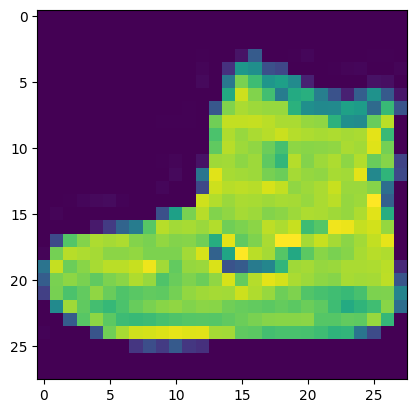

In [ ]:
plt.figure()
plt.imshow(full_train_img[0])

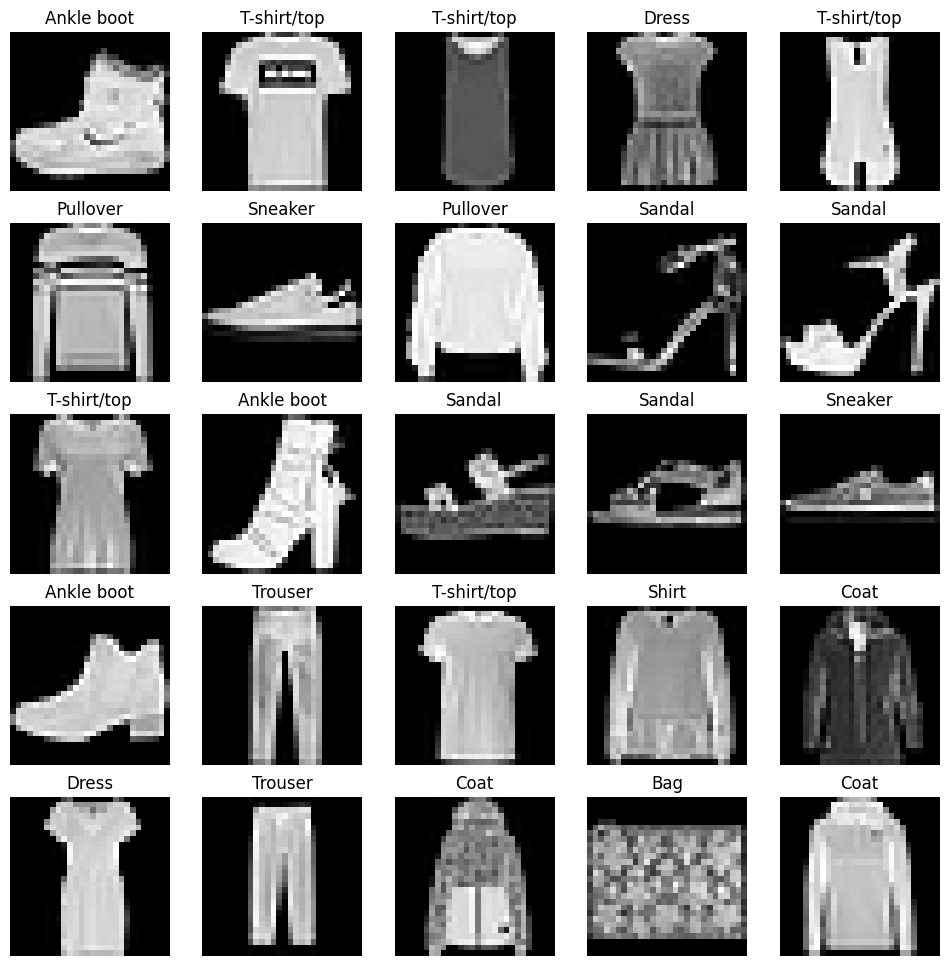

In [ ]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
rows=5
cols=5
plt.figure(figsize=(12,12))
for i in range (rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.imshow(full_train_img[i], cmap='gray')
    plt.axis("off")
    plt.title(classes[full_train_label[i]])

# **Data preprocessing**

Although there were already train and test set seperated, I want to keep the test set for the very final check, and split the train test into smaller train set and the validation one

However, if we use directly train_test_split from sklearn, the data may come up with situation that 10 classes of clothes are not distributed evenly. So I will do some data reorganize to adjust that problem

So in brief, the preprocecssing consists of:
- Train-val (evenly) split
- Scale img into range of [0,1]
- (One-hot) Encoding the label

In [ ]:
#initial numbers, data
num_class=10
train_img, train_label=[],[]
val_img, val_label=[],[]
#create classes for disstributing
class_img={i:[] for i in range(num_class)}
class_label={i:[] for i in range(num_class)}
#categorize data into seperate classes
for img, label in zip(full_train_img,full_train_label):
    class_img[label].append(img)
    class_label[label].append(label)
#split data to train and val lists
for i in range(num_class):
    img=class_img[i]
    label=class_label[i]
    train, val,t_lbl,v_lbl=train_test_split(img,label,test_size=0.1)

    train_img.extend(train)
    val_img.extend(val)

    train_label.extend(t_lbl)
    val_label.extend(v_lbl)

train_img=np.array(train_img)
train_label=np.array(train_label)
val_img=np.array(val_img)
val_label=np.array(val_label)

unique_values, counts = np.unique(train_label, return_counts=True)
print(unique_values)
print(counts)

[0 1 2 3 4 5 6 7 8 9]
[5400 5400 5400 5400 5400 5400 5400 5400 5400 5400]


In [ ]:
np.unique(val_label, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([600, 600, 600, 600, 600, 600, 600, 600, 600, 600]))

In [ ]:
#Scaling
Train_img=train_img/255
Val_img=val_img/255

In [ ]:
#Encoding
from keras.utils import to_categorical
Train_label = to_categorical(train_label, num_class)
Val_label = to_categorical(val_label, num_class)

In [ ]:
Train_label.shape

(54000, 10)

# **Creating CNN Model**

In [ ]:

model = Sequential()

model.add(Conv2D(32,(3, 3), activation='relu',padding='same', input_shape=(28,28,1)))
model.add(Conv2D(32,(3, 3), activation='relu',padding='same', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(rate=0.4))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))

model.add(Dropout(rate=0.2))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

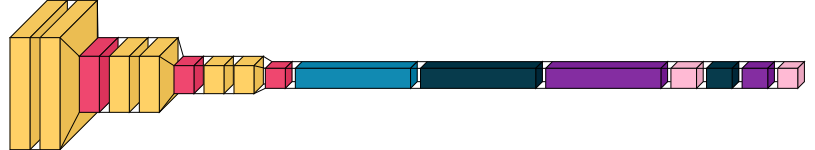

In [ ]:
visualkeras.layered_view(model)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.7191 - loss: 0.7852 - val_accuracy: 0.8597 - val_loss: 0.3827
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8744 - loss: 0.3365 - val_accuracy: 0.8923 - val_loss: 0.2934
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8992 - loss: 0.2755 - val_accuracy: 0.9112 - val_loss: 0.2521
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9107 - loss: 0.2387 - val_accuracy: 0.9033 - val_loss: 0.2657
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9174 - loss: 0.2179 - val_accuracy: 0.8683 - val_loss: 0.3624
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9259 - loss: 0.1991 - val_accuracy: 0.9207 - val_loss: 0.2356
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9295 - loss: 0.1868 - val_accuracy: 0.9182 - val_loss: 0.2335
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9331 - loss: 0.1783 - val_accuracy: 

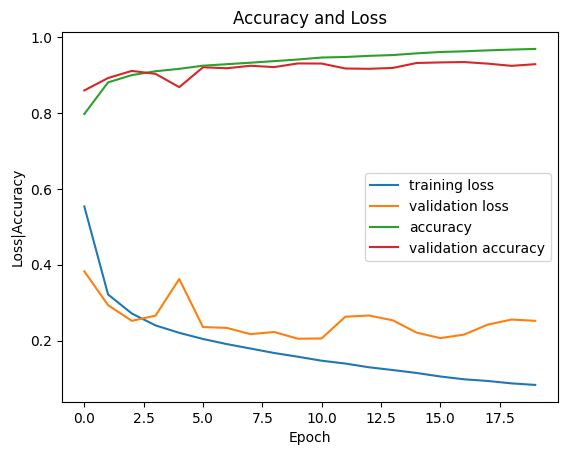

In [ ]:
numOfEpoch = 20
H = model.fit(Train_img, Train_label, validation_data=(Val_img, Val_label),
batch_size=128, epochs=numOfEpoch, verbose=1)
fig = plt.figure()
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

96% val_accuracy but the valid loss not really smooth

# **Evaluation**

In [ ]:
Test_img=test_img/255
Test_label=to_categorical(test_label,num_class)
score, accuracy = model.evaluate(Test_img, Test_label, verbose=1)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9219 - loss: 0.2655
0.9225000143051147


After so many configurations, that's the best I can do without overfitting ._.

In [ ]:
predicts=model.predict(Test_img)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
predict_label=[]
for i in range (predicts.shape[0]):
    predict_label.append(np.argmax(predicts[i]))
predict_label=np.array(predict_label)

In [ ]:
error=[i for i in range (predict_label.shape[0]) if test_label[i] != predict_label[i]]
error_img=test_img[error]
error_label=predict_label[error]
error_img.shape

(775, 28, 28)

Nearly 800 images are misclassified

**Some visualization**

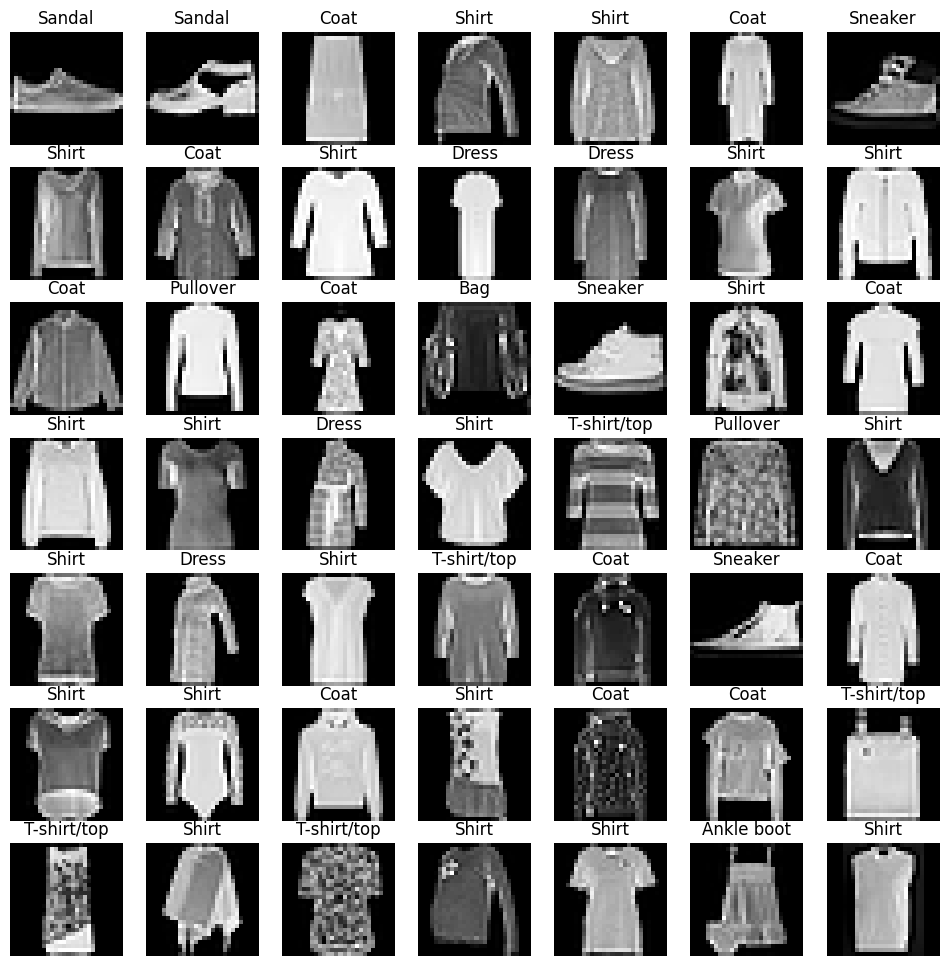

In [ ]:
rows=7
cols=7
plt.figure(figsize=(12,12))
for i in range (rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.imshow(error_img[i], cmap='gray')
    plt.axis("off")
    plt.title(classes[error_label[i]])

It's seem that there are many confusion in distinguishing between shirt-pullover-coat and sandal-sneaker-boot